In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.set_random_seed(777)

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [7]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [8]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))
L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

W3 = tf.get_variable('W3', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
# train my model
print('Learning started.')
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, train], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

Learning started.
Epoch :  0001 cost =  0.345616586
Epoch :  0002 cost =  0.091801230
Epoch :  0003 cost =  0.068259700
Epoch :  0004 cost =  0.056326393
Epoch :  0005 cost =  0.046932001
Epoch :  0006 cost =  0.040900659
Epoch :  0007 cost =  0.036504832
Epoch :  0008 cost =  0.032705021
Epoch :  0009 cost =  0.027794332
Epoch :  0010 cost =  0.024785444
Epoch :  0011 cost =  0.022157292
Epoch :  0012 cost =  0.020415193
Epoch :  0013 cost =  0.017042248
Epoch :  0014 cost =  0.015456207
Epoch :  0015 cost =  0.013407088
Learning Finished!


In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, feed_dict = {X : mnist.test.images, 
                                                     Y : mnist.test.labels}))

Accuracy :  0.9884


In [13]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction : ", sess.run(tf.argmax(logits, 1), 
                                feed_dict = {X : mnist.test.images[r:r+1]}))

Label :  [0]
Prediction :  [0]


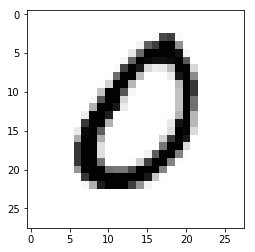

In [17]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()